In [1]:
# Along-fjord Advective Heat flux
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:

def Af_Hadv(datapath,case_id):
      
    file02 = xr.open_dataset(datapath + '/Adv_' + str(format(case_id,'03d')) + '.nc')
    file2 = file02.isel(T=~file02.get_index("T").duplicated())
    #file1 = file01.isel(T=~file01.get_index("T").duplicated())
    #state1 = file1.isel(X=range(260), Xp1=range(261), Y=range(35,45), Yp1=range(35,45), T=range(90,121))
    state2 = file2.isel(X=range(260), Xp1=range(261), Y=range(35,45), Yp1=range(35,45), T=range(89,120))
    Cp = 3994  # Specific heat content J/kg/C
    rho = 999.8 # Density
    advx = state2.ADVx_TH.data.mean(axis=(0,2)) * Cp * rho
    
    Hadv1 = np.empty(advx.shape[1])
    Hadv2 = np.empty(advx.shape[1])
    for i in range(advx.shape[1]):
        Hadvx = advx[:,i]
        Hadv1[i] = Hadvx[Hadvx>0].sum()
        Hadv2[i] = Hadvx[Hadvx<0].sum()
    return Hadv1, Hadv2

In [ ]:
datapath = '/work/oceans/wbao/MITgcm_results/iceplume/1_BaseCase/'
hsr = np.array([0.04,0.06,0.08,0.10,0.12])
case_n = np.array([1,2,3,4,5])
dist = xr.open_dataset(datapath + '/state_001.nc').Xp1.data[:261] / 1000

Hadv1 = np.empty([len(case_n), len(dist)])
Hadv2 = np.empty([len(case_n), len(dist)])

for j in range(len(case_n)):
    Hadv1[j,:], Hadv2[j,:] = Af_Hadv(datapath, case_n[j])


In [ ]:
x0 = 3
Hadv1[:,:x0] = 'nan'
Hadv2[:,:x0] = 'nan'

fig1 = plt.figure(figsize=(10,2.5))
fig1.tight_layout()

ax1 = fig1.add_subplot(111)


for k in range(len(case_n)):
    ax1.plot(dist,-Hadv2[k,:]/1e10,lw=1.5,label=str(hsr[k]))
    ax1.legend(title=r'$h_s/h$',title_fontsize=12,fontsize=12, loc="center left")
    ax1.axvline(x=dist[120], color='k', linestyle='--')
    ax1.axvline(x=dist[235], color='k', linestyle='--')
    ax1.set_ylabel(r'$H\;(\times10^{10}J/s)$',size=15)
    ax1.set_xlim([0, 20])
    ax1.set_xticks([0, 5, 10, 15, 20])
    #ax1.set_ylim([0, 5])
    ax1.tick_params(direction='in',labelsize=15)
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.set_title('Lower-layer Heat Flux', loc='center', size=15, weight='bold')  
    ax1.set_xlabel(r'Distance from glacier [km]',size=15)
    
plt.show()    

In [3]:
datapath1 = '/work/oceans/wbao/MITgcm_results/iceplume/2_Qsg_maxhs/'
datapath2 = '/work/oceans/wbao/MITgcm_results/iceplume/2_Qsg_minhs/'
case_n = np.array([3,4,5])
qsg = np.array([250,500,1000])
dist = xr.open_dataset(datapath1 + '/state_001.nc').Xp1.data[:261] / 1000

Hadv1max = np.empty([len(case_n), len(dist)])
Hadv2max = np.empty([len(case_n), len(dist)])
Hadv1min = np.empty([len(case_n), len(dist)])
Hadv2min = np.empty([len(case_n), len(dist)])

for j in range(len(case_n)):
    Hadv1max[j,:], Hadv2max[j,:] = Af_Hadv(datapath1, case_n[j])
    Hadv1min[j,:], Hadv2min[j,:] = Af_Hadv(datapath2, case_n[j])

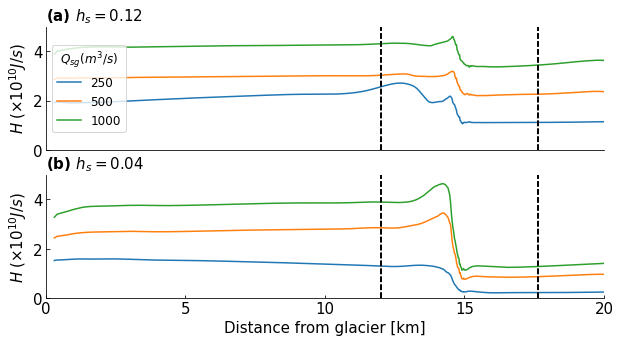

In [5]:
x0 = 3
#Hadv1[:,:x0] = 'nan'
Hadv2max[:,:x0] = 'nan'
Hadv2min[:,:x0] = 'nan'

fig2 = plt.figure(figsize=(10,5))
fig2.tight_layout()

ax1 = fig2.add_subplot(211)
ax2 = fig2.add_subplot(212)


for k in range(len(case_n)):
    ax1.plot(dist,-Hadv2max[k,:]/1e10,lw=1.5,label=str(qsg[k]))
    ax1.legend(title=r'$Q_{sg}(m^3/s)$',title_fontsize=12,fontsize=12, loc="center left")
    ax1.axvline(x=dist[120], color='k', linestyle='--')
    ax1.axvline(x=dist[235], color='k', linestyle='--')
    ax1.set_ylabel(r'$H\;(\times10^{10}J/s)$',size=15)
    ax1.set_xlim([0, 20])
    ax1.set_ylim([0, 5])
    ax1.xaxis.set_visible(False) # This erases the y ticks
    ax1.tick_params(direction='in',labelsize=15)
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.set_title('(a) $h_s=0.12$', loc='left', size=15, weight='bold')
    
    ax2.plot(dist,-Hadv2min[k,:]/1e10,lw=1.5,label=str(qsg[k]))
    #ax2.legend(title=r'$h_s/h$',title_fontsize=12,fontsize=12, loc="right")
    ax2.axvline(x=dist[120], color='k', linestyle='--')
    ax2.axvline(x=dist[235], color='k', linestyle='--')
    ax2.set_ylabel(r'$H\;(\times10^{10}J/s)$',size=15)
    ax2.set_xlabel(r'Distance from glacier [km]',size=15)
    ax2.set_xlim([0, 20])
    ax2.set_xticks([0, 5, 10, 15, 20])
    #ax2.set_xticklabels(["-5","0","5"])
    ax2.set_ylim([0, 5])
    ax2.tick_params(direction='in',labelsize=15)
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.set_title('(b) $h_s=0.04$', loc='left', size=15, weight='bold')
      
plt.show()    

In [6]:
fig_path ="/home/1959/Jupyter_Figs/FjordModeling/"
if not os.path.exists(fig_path):
    os.makedirs(fig_path)
#fig1.savefig(fig_path + '/Hadv_hs.png', dpi=200, bbox_inches='tight') 
fig2.savefig(fig_path + '/Hadv_qsg.png', dpi=200, bbox_inches='tight') 